Team :
krishnateja.k2@gmail.com
amar.r.naik@gmail.com
shankar.uday007@gmail.com
prasad.shripathi@gmail.com

# 1. Import Libraries

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
import sys
import matplotlib.pyplot as plt
import numpy as np
import random
# from torch_receptive_field import PytorchReceptiveField

!pip install torchsummary

# from receptivefield.image import get_default_image
# from torch_receptive_field import receptive_field

# 2. Mount Google Drive to get the files individual files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!rm -rf '/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/__pycache__'
!ls -lrt '/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/'

total 74
-rw------- 1 root root 42849 Feb 28 03:54 S7.ipynb
-rw------- 1 root root  4013 Mar  2 04:32 customDeepCNN.py
-rw------- 1 root root  4771 Mar  3 02:06 dataTorchTransformLoad.py
-rw------- 1 root root  2488 Mar  3 03:09 testModel.py
-rw------- 1 root root  3807 Mar  3 04:09 trainModel.py
-rw------- 1 root root 16173 Mar  3 04:30 EVA4_S7_CIFAR10.ipynb


## 2.1 Add Googledrive path to the systempath  

In [0]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/')

# 3. Import custom functions and classes

 1. dataTorchTransformLoad
 2. customDeepCNN
 3. trainModel (params for regularization and misclassification plots)
 4. testModel (params for regularization and misclassification plots)


In [0]:
import dataTorchTransformLoad as dtl
import customDeepCNN as deep_cnn
import trainModel
import testModel

In [0]:
# !cat '/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/testModel.py'

# 4. Train - Test Data Load with torch transforms

In [0]:
train,test,train_loader,test_loader = dtl.data_transform_and_load_function('CIFAR10',64)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


## 4.1 Data Statistics

In [0]:
train_transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=train_transform)
    #print(vars(train_set))
print("Shape : ", train_set.data.shape)
print("Mean : ",train_set.data.mean(axis=(0,1,2))/255)
print("Std : ",train_set.data.std(axis=(0,1,2))/255)
print("Min : ",train_set.data.min(axis=(0,1,2))/255)
print("Max : ",train_set.data.max(axis=(0,1,2))/255)

Files already downloaded and verified
Shape :  (50000, 32, 32, 3)
Mean :  [0.49139968 0.48215841 0.44653091]
Std :  [0.24703223 0.24348513 0.26158784]
Min :  [0. 0. 0.]
Max :  [1. 1. 1.]


## 4.2 Display data

[['plane' 'dog' 'deer' 'deer' 'truck' 'cat' 'truck' 'truck']
 ['cat' 'cat' 'plane' 'horse' 'plane' 'dog' 'dog' 'deer']
 ['car' 'car' 'frog' 'car' 'frog' 'dog' 'ship' 'cat']
 ['car' 'frog' 'deer' 'bird' 'deer' 'bird' 'cat' 'horse']
 ['car' 'cat' 'cat' 'ship' 'horse' 'plane' 'plane' 'plane']
 ['truck' 'plane' 'frog' 'horse' 'ship' 'deer' 'bird' 'plane']
 ['cat' 'dog' 'bird' 'truck' 'dog' 'cat' 'deer' 'dog']
 ['dog' 'frog' 'horse' 'frog' 'ship' 'deer' 'plane' 'truck']]


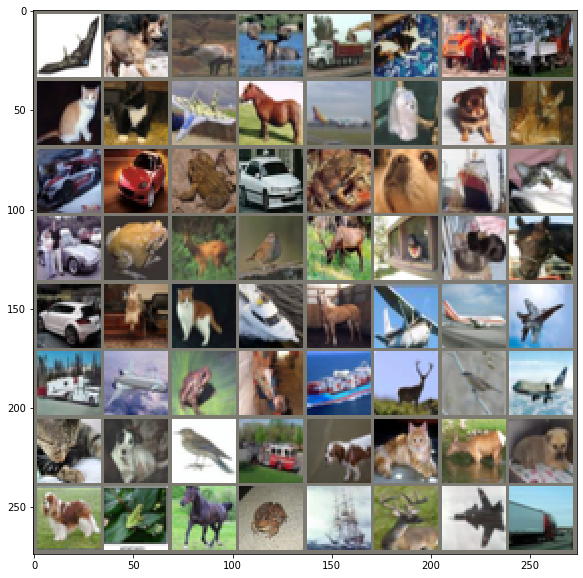

In [0]:
# functions to show an image
def imageshow(img):
    # img = img / 2 + 0.5      #unnormalize
    img[0] = img[0]*0.24703223 + 0.49139968
    img[1] = img[1]*0.24348513 + 0.48215841
    img[2] = img[2]*0.26158784 + 0.44653091
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

random.seed(1)
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
random.seed(1)
imageshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(64)))
print(np.array([classes[labels[j]] for j in range(64)]).reshape(8,8))

# 5. Load Model and print ModelSummary

In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = deep_cnn.Net(no_input_channels = 3).to(device)
# model = Net(3).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             864
       BatchNorm2d-2           [-1, 32, 30, 30]              64
           Dropout-3           [-1, 32, 30, 30]               0
              ReLU-4           [-1, 32, 30, 30]               0
            Conv2d-5           [-1, 32, 36, 36]             288
       BatchNorm2d-6           [-1, 32, 36, 36]              64
            Conv2d-7           [-1, 32, 44, 44]           1,024
       BatchNorm2d-8           [-1, 32, 44, 44]              64
           Dropout-9           [-1, 32, 44, 44]               0
             ReLU-10           [-1, 32, 44, 44]               0
        MaxPool2d-11           [-1, 32, 22, 22]               0
           Conv2d-12           [-1, 16, 22, 22]             512
           Conv2d-13           [-1, 32, 22, 22]           4,608
      BatchNorm2d-14           [-1

# 6. Run Models

## 6.1 Normal Run - No Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.3133597373962402 Batch_id=0 Accuracy=6.25:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=1.1348360776901245 Batch_id=781 Accuracy=47.22: 100%|██████████| 782/782 [00:36<00:00, 21.62it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_gra


Test set: Average loss: 1.3739, Accuracy: 4974/10000 (49.74%)

EPOCH: 1


Loss=1.1255512237548828 Batch_id=781 Accuracy=62.14: 100%|██████████| 782/782 [00:35<00:00, 22.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0912, Accuracy: 6091/10000 (60.91%)

EPOCH: 2


Loss=0.8823864459991455 Batch_id=781 Accuracy=67.91: 100%|██████████| 782/782 [00:35<00:00, 22.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0351, Accuracy: 6314/10000 (63.14%)

EPOCH: 3


Loss=1.0904704332351685 Batch_id=781 Accuracy=71.27: 100%|██████████| 782/782 [00:35<00:00, 22.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8390, Accuracy: 7038/10000 (70.38%)

EPOCH: 4


Loss=0.6734805107116699 Batch_id=781 Accuracy=73.78: 100%|██████████| 782/782 [00:35<00:00, 22.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8160, Accuracy: 7141/10000 (71.41%)

EPOCH: 5


Loss=1.1548669338226318 Batch_id=781 Accuracy=75.39: 100%|██████████| 782/782 [00:35<00:00, 22.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8287, Accuracy: 7108/10000 (71.08%)

EPOCH: 6


Loss=0.5593136548995972 Batch_id=781 Accuracy=76.68: 100%|██████████| 782/782 [00:35<00:00, 22.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7940, Accuracy: 7177/10000 (71.77%)

EPOCH: 7


Loss=0.6547114253044128 Batch_id=781 Accuracy=80.31: 100%|██████████| 782/782 [00:35<00:00, 22.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5893, Accuracy: 7941/10000 (79.41%)

EPOCH: 8


Loss=0.3927147090435028 Batch_id=781 Accuracy=81.02: 100%|██████████| 782/782 [00:35<00:00, 22.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5809, Accuracy: 7985/10000 (79.85%)

EPOCH: 9


Loss=0.5448333024978638 Batch_id=781 Accuracy=81.07: 100%|██████████| 782/782 [00:35<00:00, 22.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5701, Accuracy: 8053/10000 (80.53%)

EPOCH: 10


Loss=0.4175527095794678 Batch_id=781 Accuracy=81.42: 100%|██████████| 782/782 [00:35<00:00, 22.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5704, Accuracy: 8049/10000 (80.49%)

EPOCH: 11


Loss=0.6437492370605469 Batch_id=781 Accuracy=81.61: 100%|██████████| 782/782 [00:35<00:00, 21.87it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5707, Accuracy: 8022/10000 (80.22%)

EPOCH: 12


Loss=0.5053322911262512 Batch_id=781 Accuracy=82.22: 100%|██████████| 782/782 [00:36<00:00, 21.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5506, Accuracy: 8113/10000 (81.13%)

EPOCH: 13


Loss=1.1322605609893799 Batch_id=781 Accuracy=82.14: 100%|██████████| 782/782 [00:36<00:00, 21.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5494, Accuracy: 8117/10000 (81.17%)

EPOCH: 14


Loss=0.5793799757957458 Batch_id=781 Accuracy=82.12: 100%|██████████| 782/782 [00:36<00:00, 21.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5529, Accuracy: 8106/10000 (81.06%)

EPOCH: 15


Loss=0.26049691438674927 Batch_id=781 Accuracy=82.32: 100%|██████████| 782/782 [00:36<00:00, 21.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5500, Accuracy: 8114/10000 (81.14%)

EPOCH: 16


Loss=1.3532898426055908 Batch_id=781 Accuracy=82.47: 100%|██████████| 782/782 [00:36<00:00, 21.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5532, Accuracy: 8099/10000 (80.99%)

EPOCH: 17


Loss=0.2031310498714447 Batch_id=781 Accuracy=82.36: 100%|██████████| 782/782 [00:35<00:00, 21.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5585, Accuracy: 8075/10000 (80.75%)

EPOCH: 18


Loss=0.8613831400871277 Batch_id=781 Accuracy=82.29: 100%|██████████| 782/782 [00:35<00:00, 22.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5570, Accuracy: 8088/10000 (80.88%)

EPOCH: 19


Loss=0.4776427745819092 Batch_id=781 Accuracy=82.23: 100%|██████████| 782/782 [00:35<00:00, 23.96it/s]



Test set: Average loss: 0.5532, Accuracy: 8103/10000 (81.03%)



Text(0.5, 1.0, 'Test Accuracy')

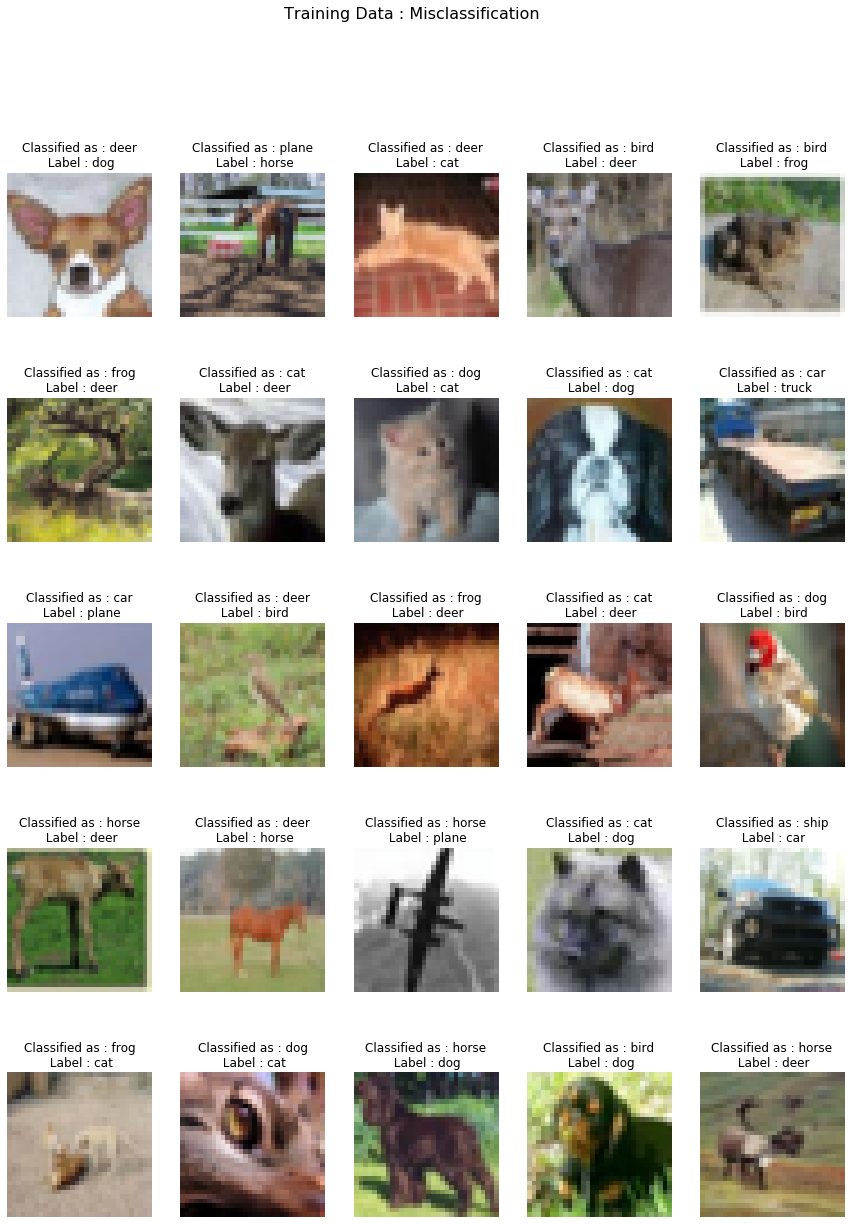

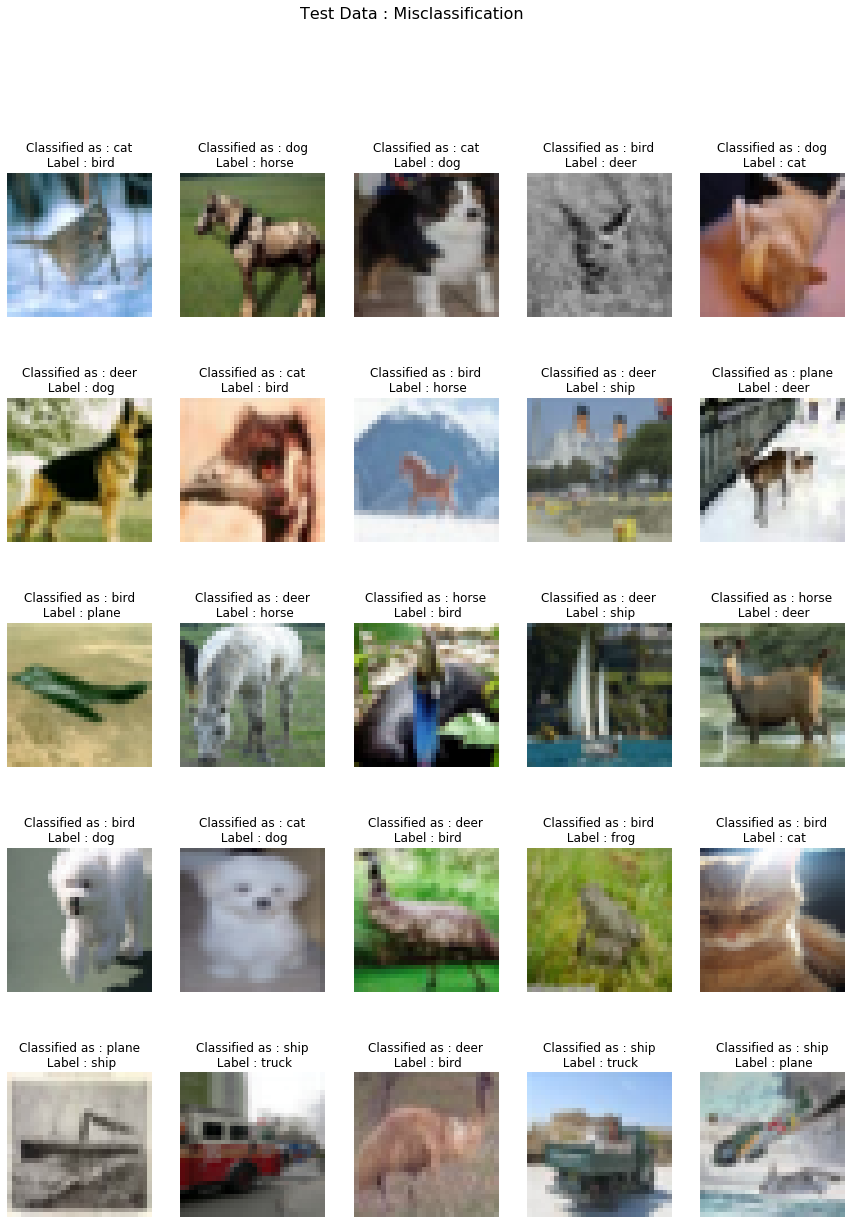

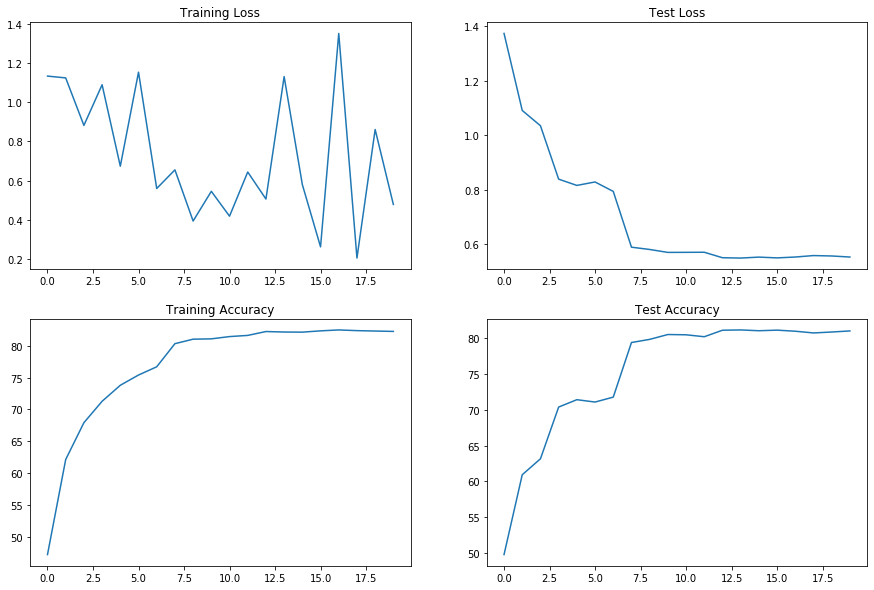

In [0]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = deep_cnn.Net(no_input_channels = 3).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses = []
train_acc = []
test_losses = []
test_acc = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'Normal', True, EPOCHS-1)
    train_losses.append(tr_losses)
    train_acc.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'Normal',True, EPOCHS-1)
    test_losses.append(ts_loss)
    test_acc.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

## 6.2 Model with - L1 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.537102222442627 Batch_id=0 Accuracy=10.94:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=2.0506114959716797 Batch_id=781 Accuracy=44.27: 100%|██████████| 782/782 [00:38<00:00, 20.30it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_gra


Test set: Average loss: 2.0615, Accuracy: 3486/10000 (34.86%)

EPOCH: 1


Loss=1.807983636856079 Batch_id=781 Accuracy=57.29: 100%|██████████| 782/782 [00:38<00:00, 20.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5859, Accuracy: 4559/10000 (45.59%)

EPOCH: 2


Loss=1.658494234085083 Batch_id=781 Accuracy=61.81: 100%|██████████| 782/782 [00:38<00:00, 20.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.6579, Accuracy: 4409/10000 (44.09%)

EPOCH: 3


Loss=1.6503427028656006 Batch_id=781 Accuracy=64.36: 100%|██████████| 782/782 [00:38<00:00, 22.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2155, Accuracy: 5671/10000 (56.71%)

EPOCH: 4


Loss=1.3139708042144775 Batch_id=781 Accuracy=65.95: 100%|██████████| 782/782 [00:38<00:00, 20.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1757, Accuracy: 5908/10000 (59.08%)

EPOCH: 5


Loss=1.8976151943206787 Batch_id=781 Accuracy=66.70: 100%|██████████| 782/782 [00:38<00:00, 22.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2807, Accuracy: 5563/10000 (55.63%)

EPOCH: 6


Loss=1.8437480926513672 Batch_id=781 Accuracy=67.82: 100%|██████████| 782/782 [00:38<00:00, 20.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9801, Accuracy: 6528/10000 (65.28%)

EPOCH: 7


Loss=1.4110476970672607 Batch_id=781 Accuracy=73.65: 100%|██████████| 782/782 [00:38<00:00, 20.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7604, Accuracy: 7360/10000 (73.60%)

EPOCH: 8


Loss=1.688603401184082 Batch_id=781 Accuracy=75.17: 100%|██████████| 782/782 [00:38<00:00, 20.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7528, Accuracy: 7376/10000 (73.76%)

EPOCH: 9


Loss=1.2404186725616455 Batch_id=781 Accuracy=75.42: 100%|██████████| 782/782 [00:38<00:00, 20.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7235, Accuracy: 7504/10000 (75.04%)

EPOCH: 10


Loss=1.5964508056640625 Batch_id=781 Accuracy=75.54: 100%|██████████| 782/782 [00:38<00:00, 20.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7903, Accuracy: 7206/10000 (72.06%)

EPOCH: 11


Loss=1.632547378540039 Batch_id=781 Accuracy=75.59: 100%|██████████| 782/782 [00:38<00:00, 22.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7394, Accuracy: 7432/10000 (74.32%)

EPOCH: 12


Loss=1.8483645915985107 Batch_id=781 Accuracy=77.28: 100%|██████████| 782/782 [00:39<00:00, 19.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6871, Accuracy: 7605/10000 (76.05%)

EPOCH: 13


Loss=0.9106519222259521 Batch_id=781 Accuracy=77.49: 100%|██████████| 782/782 [00:38<00:00, 22.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6814, Accuracy: 7598/10000 (75.98%)

EPOCH: 14


Loss=1.044215440750122 Batch_id=781 Accuracy=77.53: 100%|██████████| 782/782 [00:38<00:00, 20.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6774, Accuracy: 7635/10000 (76.35%)

EPOCH: 15


Loss=1.3878549337387085 Batch_id=781 Accuracy=77.50: 100%|██████████| 782/782 [00:38<00:00, 22.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6991, Accuracy: 7541/10000 (75.41%)

EPOCH: 16


Loss=1.051260232925415 Batch_id=781 Accuracy=77.83: 100%|██████████| 782/782 [00:39<00:00, 19.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6811, Accuracy: 7629/10000 (76.29%)

EPOCH: 17


Loss=1.431298851966858 Batch_id=781 Accuracy=77.94: 100%|██████████| 782/782 [00:39<00:00, 19.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6870, Accuracy: 7604/10000 (76.04%)

EPOCH: 18


Loss=1.3688583374023438 Batch_id=781 Accuracy=77.84: 100%|██████████| 782/782 [00:38<00:00, 22.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6740, Accuracy: 7643/10000 (76.43%)

EPOCH: 19


Loss=1.0791699886322021 Batch_id=781 Accuracy=77.73: 100%|██████████| 782/782 [00:39<00:00, 23.25it/s]



Test set: Average loss: 0.6985, Accuracy: 7540/10000 (75.40%)



Text(0.5, 1.0, 'Test Accuracy')

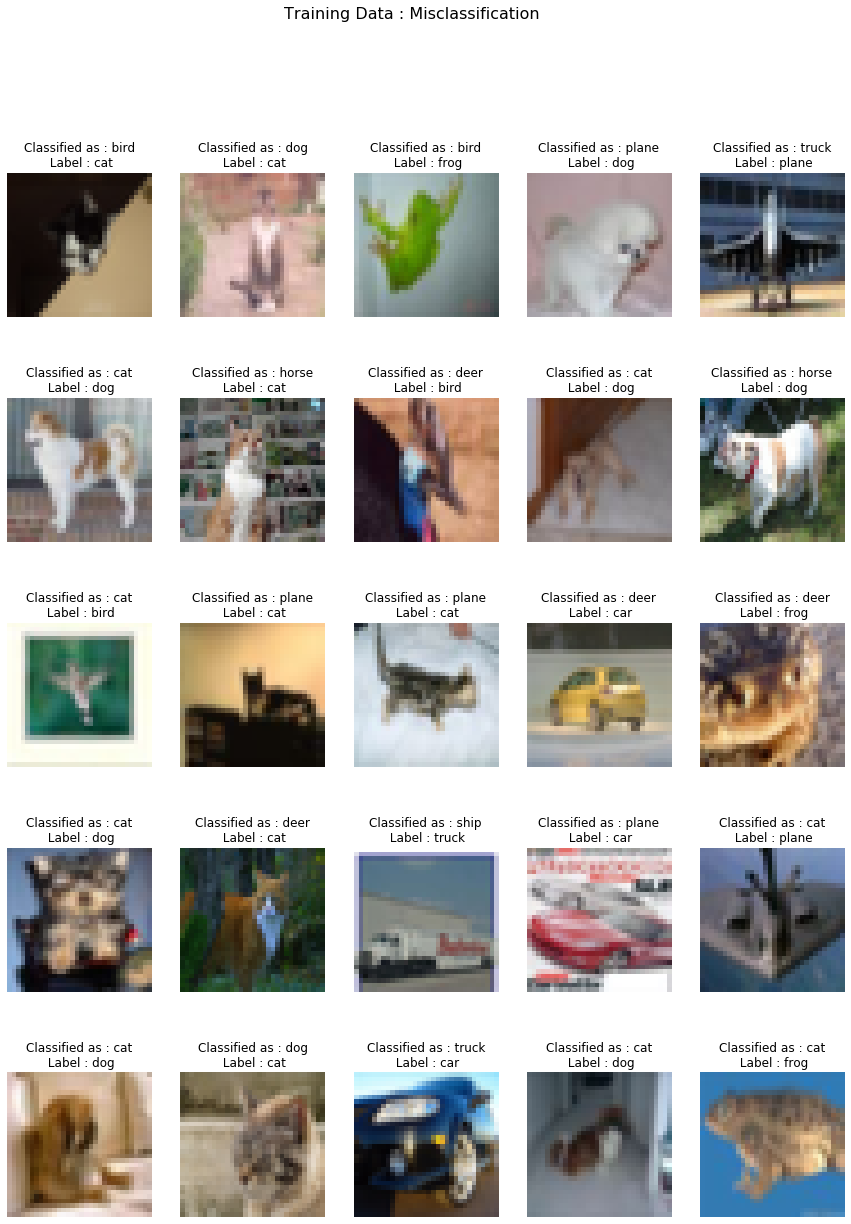

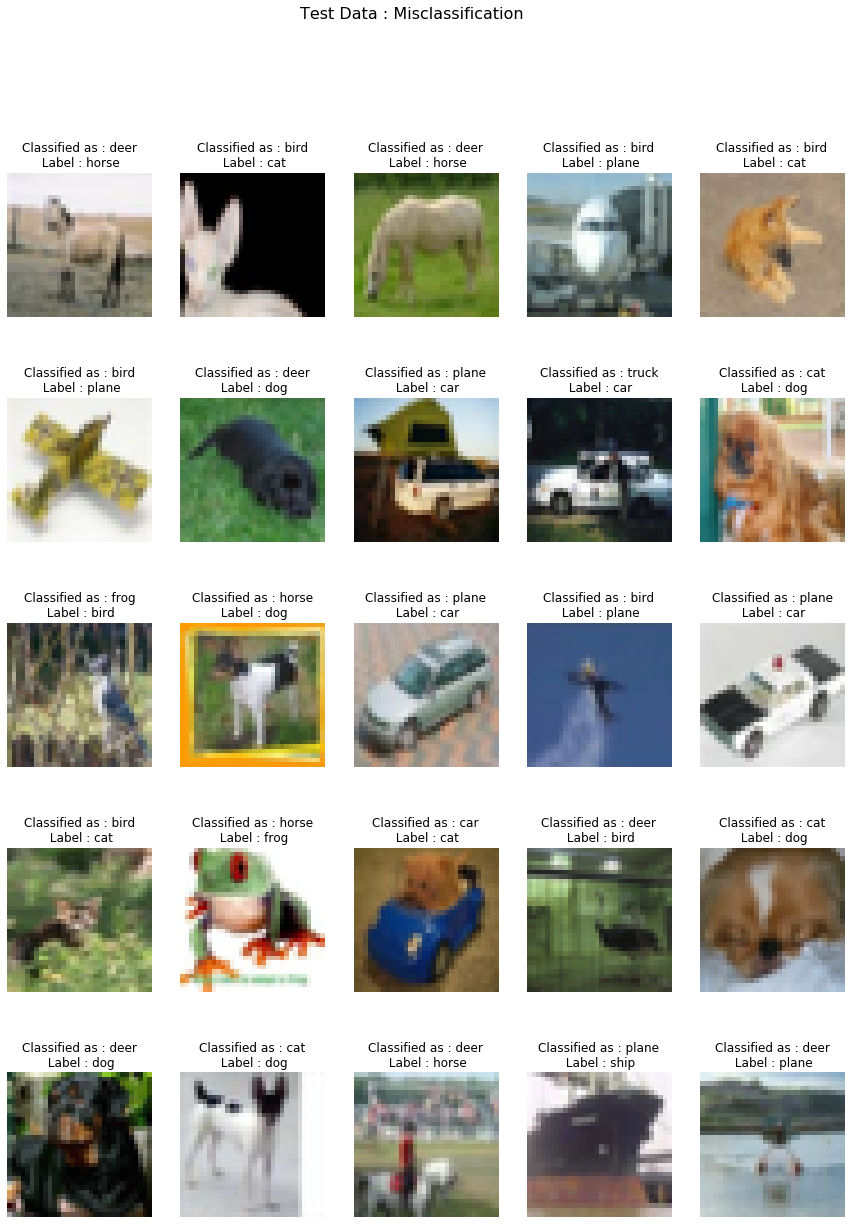

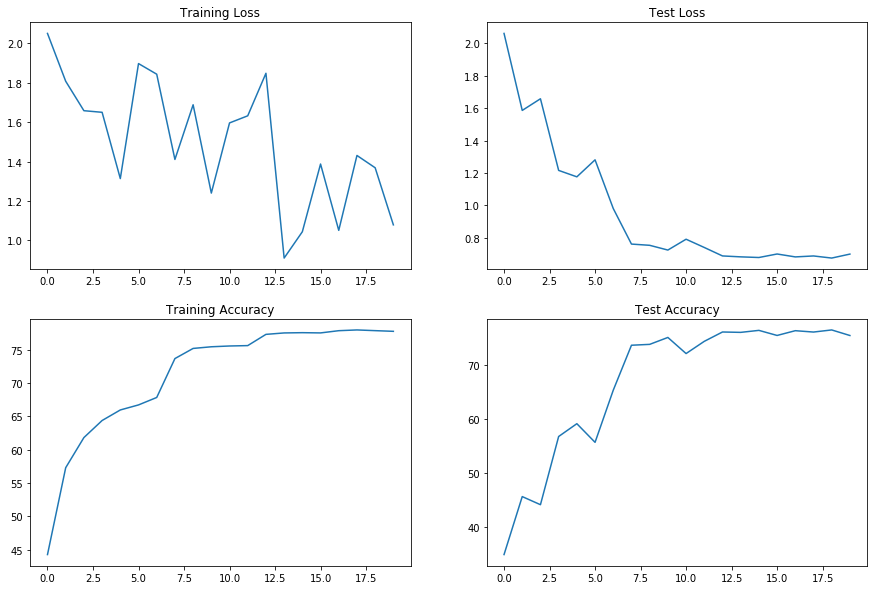

In [0]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = deep_cnn.Net(no_input_channels = 3).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L1 = []
train_acc_L1 = []
test_losses_L1 = []
test_acc_L1 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'L1', True, EPOCHS-1)
    train_losses_L1.append(tr_losses)
    train_acc_L1.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'L1',True, EPOCHS-1)
    test_losses_L1.append(ts_loss)
    test_acc_L1.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L1)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L1)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L1)
axs[1, 1].set_title("Test Accuracy")

## 6.3 Model with - L2 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.2882440090179443 Batch_id=0 Accuracy=18.75:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=1.2518444061279297 Batch_id=781 Accuracy=47.23: 100%|██████████| 782/782 [00:35<00:00, 22.14it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_gr


Test set: Average loss: 1.3569, Accuracy: 5166/10000 (51.66%)

EPOCH: 1


Loss=0.9520736932754517 Batch_id=781 Accuracy=62.49: 100%|██████████| 782/782 [00:35<00:00, 23.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1068, Accuracy: 6053/10000 (60.53%)

EPOCH: 2


Loss=0.8473315238952637 Batch_id=781 Accuracy=67.58: 100%|██████████| 782/782 [00:35<00:00, 22.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9773, Accuracy: 6625/10000 (66.25%)

EPOCH: 3


Loss=0.8338418006896973 Batch_id=781 Accuracy=70.99: 100%|██████████| 782/782 [00:35<00:00, 21.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1130, Accuracy: 6241/10000 (62.41%)

EPOCH: 4


Loss=0.6136653423309326 Batch_id=781 Accuracy=73.55: 100%|██████████| 782/782 [00:35<00:00, 21.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7834, Accuracy: 7304/10000 (73.04%)

EPOCH: 5


Loss=0.9256970882415771 Batch_id=781 Accuracy=74.97: 100%|██████████| 782/782 [00:35<00:00, 21.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8623, Accuracy: 6960/10000 (69.60%)

EPOCH: 6


Loss=0.5375417470932007 Batch_id=781 Accuracy=76.17: 100%|██████████| 782/782 [00:35<00:00, 21.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6996, Accuracy: 7573/10000 (75.73%)

EPOCH: 7


Loss=0.6845642328262329 Batch_id=781 Accuracy=80.37: 100%|██████████| 782/782 [00:35<00:00, 21.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5809, Accuracy: 7993/10000 (79.93%)

EPOCH: 8


Loss=0.6053481101989746 Batch_id=781 Accuracy=81.32: 100%|██████████| 782/782 [00:35<00:00, 21.98it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5621, Accuracy: 8054/10000 (80.54%)

EPOCH: 9


Loss=0.3170190751552582 Batch_id=781 Accuracy=81.65: 100%|██████████| 782/782 [00:35<00:00, 22.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5436, Accuracy: 8119/10000 (81.19%)

EPOCH: 10


Loss=0.7639653086662292 Batch_id=781 Accuracy=82.11: 100%|██████████| 782/782 [00:35<00:00, 22.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5436, Accuracy: 8116/10000 (81.16%)

EPOCH: 11


Loss=0.6940425038337708 Batch_id=781 Accuracy=82.33: 100%|██████████| 782/782 [00:35<00:00, 22.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5508, Accuracy: 8102/10000 (81.02%)

EPOCH: 12


Loss=0.5429682731628418 Batch_id=781 Accuracy=83.01: 100%|██████████| 782/782 [00:35<00:00, 22.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5298, Accuracy: 8177/10000 (81.77%)

EPOCH: 13


Loss=0.3058769702911377 Batch_id=781 Accuracy=83.24: 100%|██████████| 782/782 [00:35<00:00, 22.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5355, Accuracy: 8135/10000 (81.35%)

EPOCH: 14


Loss=0.6807687282562256 Batch_id=781 Accuracy=83.46: 100%|██████████| 782/782 [00:35<00:00, 22.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5338, Accuracy: 8135/10000 (81.35%)

EPOCH: 15


Loss=0.8524532318115234 Batch_id=781 Accuracy=83.14: 100%|██████████| 782/782 [00:35<00:00, 22.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5266, Accuracy: 8175/10000 (81.75%)

EPOCH: 16


Loss=0.6906144618988037 Batch_id=781 Accuracy=83.29: 100%|██████████| 782/782 [00:35<00:00, 22.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5328, Accuracy: 8149/10000 (81.49%)

EPOCH: 17


Loss=0.3251616954803467 Batch_id=781 Accuracy=83.50: 100%|██████████| 782/782 [00:35<00:00, 22.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5344, Accuracy: 8143/10000 (81.43%)

EPOCH: 18


Loss=0.27644026279449463 Batch_id=781 Accuracy=83.29: 100%|██████████| 782/782 [00:35<00:00, 22.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5315, Accuracy: 8146/10000 (81.46%)

EPOCH: 19


Loss=0.45822766423225403 Batch_id=781 Accuracy=83.37: 100%|██████████| 782/782 [00:35<00:00, 23.75it/s]



Test set: Average loss: 0.5412, Accuracy: 8109/10000 (81.09%)



Text(0.5, 1.0, 'Test Accuracy')

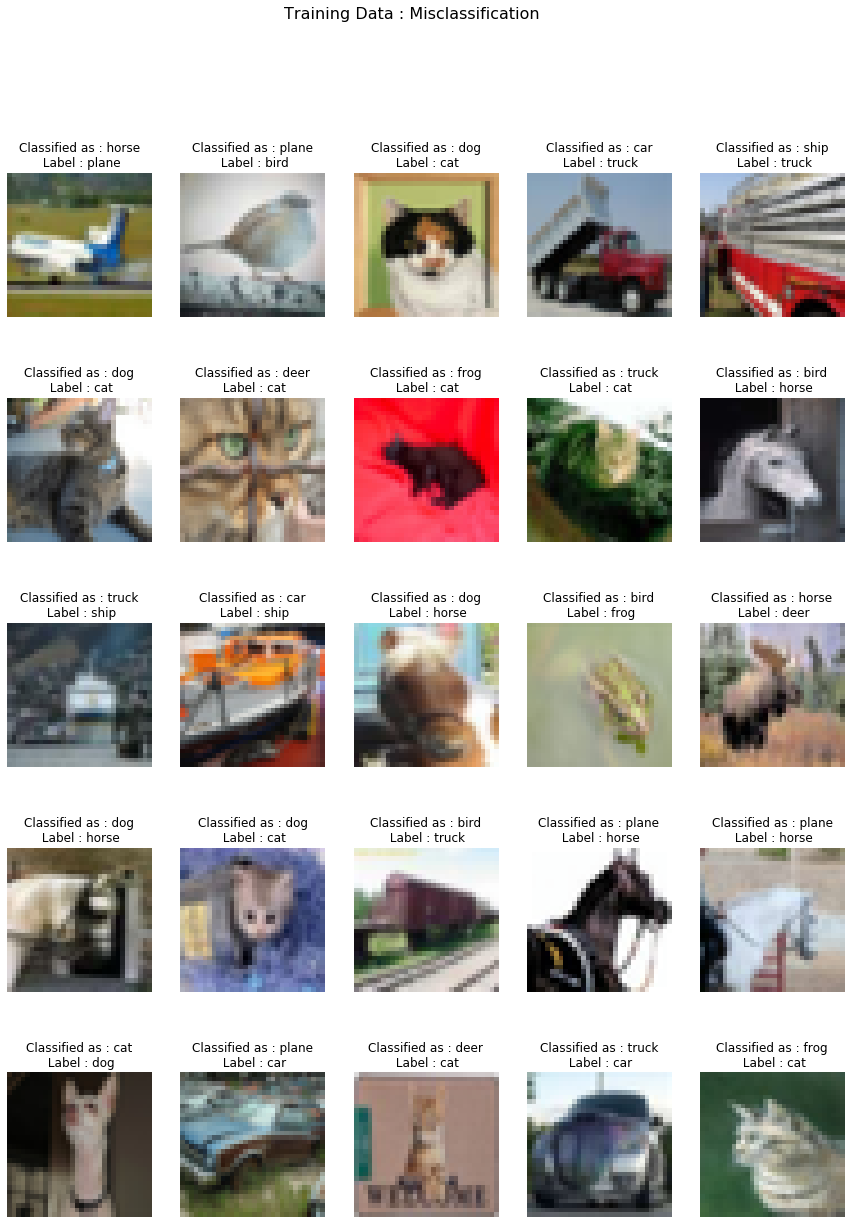

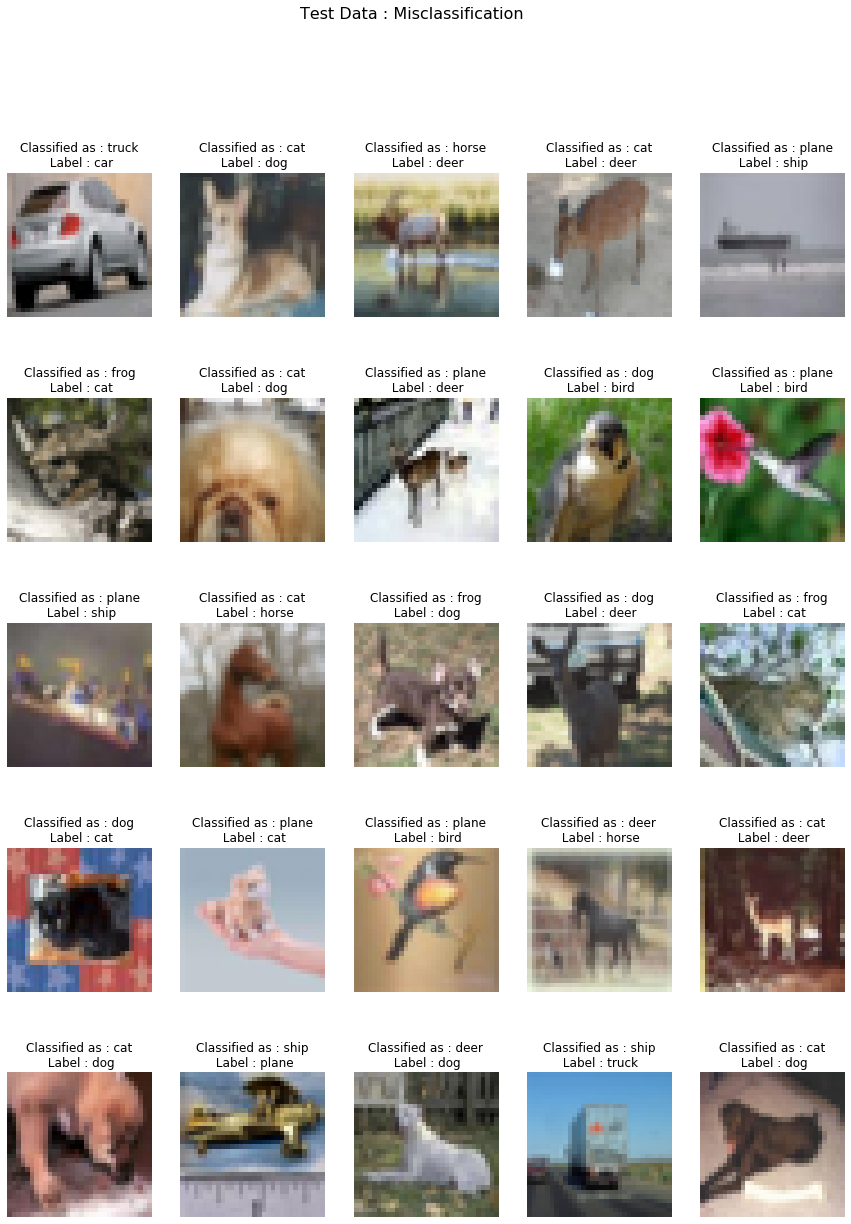

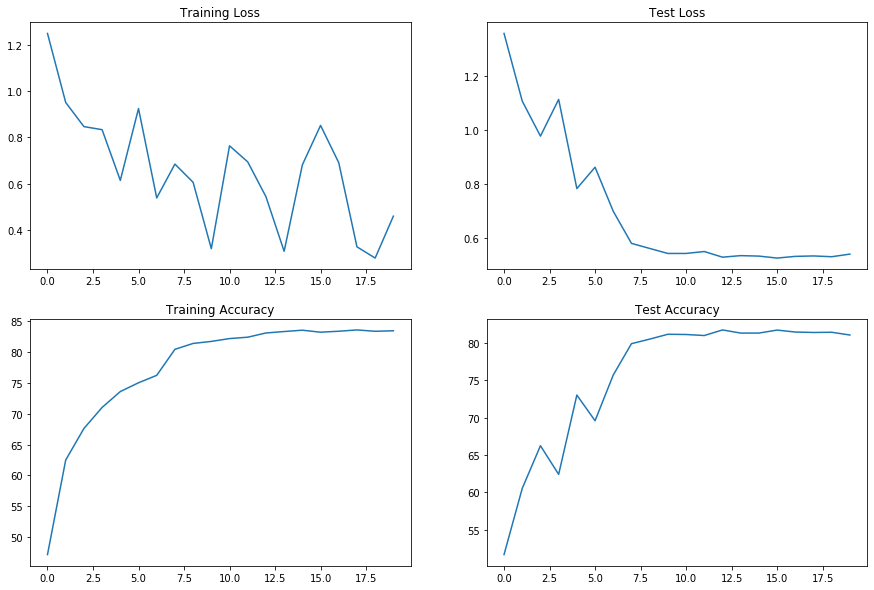

In [0]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = deep_cnn.Net(no_input_channels = 3).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.001)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L2 = []
train_acc_L2 = []
test_losses_L2 = []
test_acc_L2 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'L2', True, EPOCHS-1)
    train_losses_L2.append(tr_losses)
    train_acc_L2.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'L2',True, EPOCHS-1)
    test_losses_L2.append(ts_loss)
    test_acc_L2.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L2)
axs[1, 1].set_title("Test Accuracy")

## 6.4 Model with - L1 & L2 Regularization

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.599884986877441 Batch_id=0 Accuracy=12.50:   0%|          | 0/782 [00:00<?, ?it/s]/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/trainModel.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_(True)
Loss=2.14432692527771 Batch_id=781 Accuracy=45.16: 100%|██████████| 782/782 [00:39<00:00, 19.79it/s]
/content/drive/My Drive/Colab Notebooks/EVA4/S7 - CIFAR10-Structure/testModel.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor((~pred.eq(target.view_as(pred))), dtype=torch.float, device = device).clone().detach().requires_grad_


Test set: Average loss: 1.4564, Accuracy: 4626/10000 (46.26%)

EPOCH: 1


Loss=1.8483794927597046 Batch_id=781 Accuracy=56.46: 100%|██████████| 782/782 [00:39<00:00, 22.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1997, Accuracy: 5678/10000 (56.78%)

EPOCH: 2


Loss=1.5382254123687744 Batch_id=781 Accuracy=60.29: 100%|██████████| 782/782 [00:39<00:00, 19.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2764, Accuracy: 5320/10000 (53.20%)

EPOCH: 3


Loss=1.5880078077316284 Batch_id=781 Accuracy=63.30: 100%|██████████| 782/782 [00:39<00:00, 22.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2573, Accuracy: 5598/10000 (55.98%)

EPOCH: 4


Loss=1.6010849475860596 Batch_id=781 Accuracy=64.99: 100%|██████████| 782/782 [00:39<00:00, 22.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4063, Accuracy: 5277/10000 (52.77%)

EPOCH: 5


Loss=1.7677335739135742 Batch_id=781 Accuracy=66.29: 100%|██████████| 782/782 [00:38<00:00, 20.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1696, Accuracy: 5888/10000 (58.88%)

EPOCH: 6


Loss=1.5291283130645752 Batch_id=781 Accuracy=66.94: 100%|██████████| 782/782 [00:38<00:00, 22.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2038, Accuracy: 5791/10000 (57.91%)

EPOCH: 7


Loss=1.1988892555236816 Batch_id=781 Accuracy=73.13: 100%|██████████| 782/782 [00:38<00:00, 20.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7702, Accuracy: 7364/10000 (73.64%)

EPOCH: 8


Loss=1.4426666498184204 Batch_id=781 Accuracy=74.46: 100%|██████████| 782/782 [00:38<00:00, 20.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8275, Accuracy: 7112/10000 (71.12%)

EPOCH: 9


Loss=1.392622947692871 Batch_id=781 Accuracy=74.99: 100%|██████████| 782/782 [00:38<00:00, 20.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8207, Accuracy: 7133/10000 (71.33%)

EPOCH: 10


Loss=1.5060219764709473 Batch_id=781 Accuracy=75.06: 100%|██████████| 782/782 [00:38<00:00, 20.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7813, Accuracy: 7338/10000 (73.38%)

EPOCH: 11


Loss=1.5120842456817627 Batch_id=781 Accuracy=75.26: 100%|██████████| 782/782 [00:38<00:00, 20.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9277, Accuracy: 6761/10000 (67.61%)

EPOCH: 12


Loss=1.0790120363235474 Batch_id=781 Accuracy=76.98: 100%|██████████| 782/782 [00:38<00:00, 20.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7213, Accuracy: 7491/10000 (74.91%)

EPOCH: 13


Loss=1.1993117332458496 Batch_id=781 Accuracy=77.49: 100%|██████████| 782/782 [00:37<00:00, 20.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7004, Accuracy: 7536/10000 (75.36%)

EPOCH: 14


Loss=1.0357475280761719 Batch_id=781 Accuracy=77.36: 100%|██████████| 782/782 [00:38<00:00, 20.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6980, Accuracy: 7546/10000 (75.46%)

EPOCH: 15


Loss=1.054653525352478 Batch_id=781 Accuracy=77.91: 100%|██████████| 782/782 [00:38<00:00, 20.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7006, Accuracy: 7564/10000 (75.64%)

EPOCH: 16


Loss=1.0453026294708252 Batch_id=781 Accuracy=77.84: 100%|██████████| 782/782 [00:38<00:00, 20.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6961, Accuracy: 7578/10000 (75.78%)

EPOCH: 17


Loss=1.0006165504455566 Batch_id=781 Accuracy=77.90: 100%|██████████| 782/782 [00:38<00:00, 22.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6864, Accuracy: 7627/10000 (76.27%)

EPOCH: 18


Loss=1.1198675632476807 Batch_id=781 Accuracy=77.82: 100%|██████████| 782/782 [00:38<00:00, 20.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7030, Accuracy: 7556/10000 (75.56%)

EPOCH: 19


Loss=1.281580924987793 Batch_id=781 Accuracy=77.82: 100%|██████████| 782/782 [00:38<00:00, 22.95it/s]



Test set: Average loss: 0.6981, Accuracy: 7577/10000 (75.77%)



Text(0.5, 1.0, 'Test Accuracy')

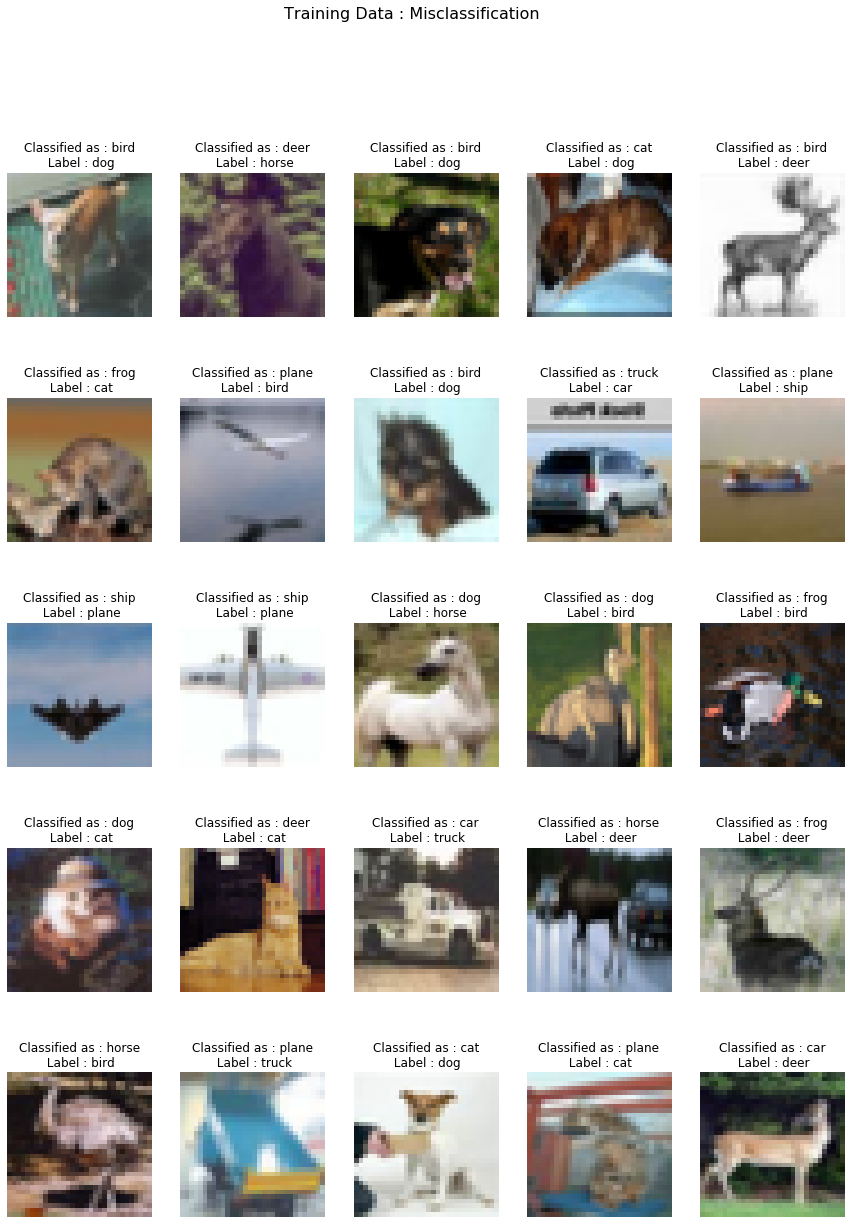

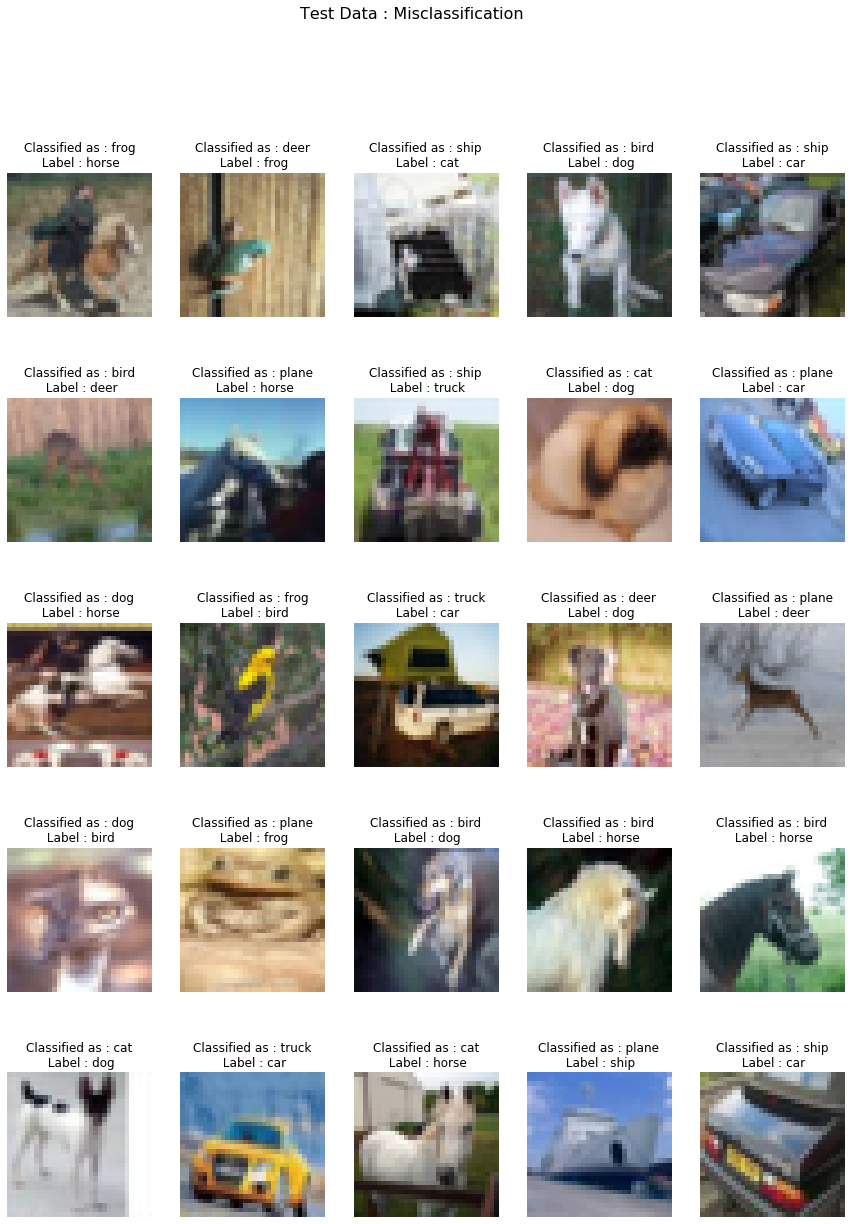

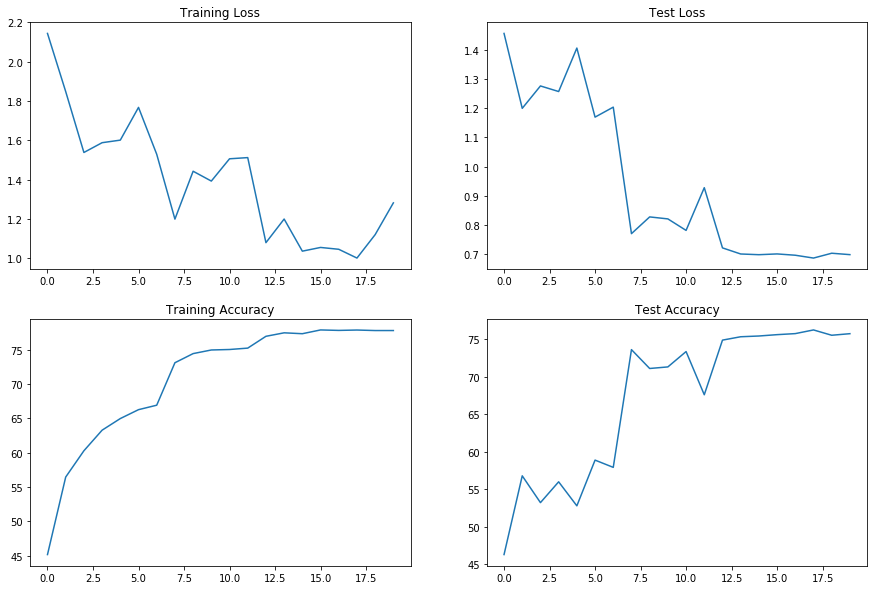

In [0]:
from torch.optim.lr_scheduler import StepLR,MultiStepLR
model = deep_cnn.Net(no_input_channels = 3).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.001)
scheduler = MultiStepLR(optimizer, milestones=[7, 12, 15, 18], gamma=0.1)
EPOCHS = 20
train_losses_L1_L2 = []
train_acc_L1_L2 = []
test_losses_L1_L2 = []
test_acc_L1_L2 = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    tr_acc,tr_losses = trainModel.train(model, device, train_loader, optimizer, epoch,'ElastiNet', True, EPOCHS-1)
    train_losses_L1_L2.append(tr_losses)
    train_acc_L1_L2.append(tr_acc)
    scheduler.step()
    ts_acc,ts_loss = testModel.test(model, device, test_loader,epoch,'ElastiNet',True, EPOCHS-1)
    test_losses_L1_L2.append(ts_loss)
    test_acc_L1_L2.append(ts_acc)    

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses_L1_L2)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_L1_L2)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses_L1_L2)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_L1_L2)
axs[1, 1].set_title("Test Accuracy")

# 7. Display ReceptiveField calculations

In [0]:
# https://gist.github.com/Nikasa1889/781a8eb20c5b32f8e378353cde4daa51#file-computereceptivefield-py
import math
import sys
# final_model - high RF
convnet =   [[3,1,0],[3,1,4],[1,1,4],[2,2,0],[1,1,0],[5,1,2],[5,1,2],[5,1,2],[2,2,0],
             [1,1,0], [5, 1, 2],[5,1,2],[9,9,0],[1,1,0]]
layer_names = ['conv1','conv2','conv3','MP1','conv4','conv5','conv6','conv7','MP2', 
               'conv8','conv9','conv10','GAP','conv11']
# other_model - low RF
# convnet =   [[3,1,0],[3,1,4],[1,1,4],[2,2,0],[1,1,0],[5,1,2],[5,1,2],[5,1,2],#[2,2,0],
#              [1,1,0], [3, 1, 0],[3,1,0],[7,7,0],[1,1,0]]
# layer_names = ['conv1','conv2','conv3','MP1','conv4','conv5','conv6','conv7',#'MP2', 
#                'conv8','conv9','conv10','GAP','conv11']               
imsize = 32

def outFromIn(conv, layerIn):
  n_in = layerIn[0]
  j_in = layerIn[1]
  r_in = layerIn[2]
  start_in = layerIn[3]
  k = conv[0]
  s = conv[1]
  p = conv[2]
  
  n_out = math.floor((n_in - k + 2*p)/s) + 1
  actualP = (n_out-1)*s - n_in + k 
  pR = math.ceil(actualP/2)
  pL = math.floor(actualP/2)
  
  j_out = j_in * s
  r_out = r_in + (k - 1)*j_in
  start_out = start_in + ((k-1)/2 - pL)*j_in
  return n_out, j_out, r_out, start_out
  
def printLayer(layer, layer_name):
  print(layer_name + ":")
  print("\t n features: %s \n \t jump: %s \n \t receptive size: %s \n \t start: %s " % (layer[0], layer[1], layer[2], layer[3]))
 
layerInfos = []
if __name__ == '__main__':
#first layer is the data layer (image) with n_0 = image size; j_0 = 1; r_0 = 1; and start_0 = 0.5
  print ("-------Net summary------")
  currentLayer = [imsize, 1, 1, 0.5]
  printLayer(currentLayer, "input image")
  for i in range(len(convnet)):
    currentLayer = outFromIn(convnet[i], currentLayer)
    layerInfos.append(currentLayer)
    printLayer(currentLayer, layer_names[i])
  print ("------------------------")
  # layer_name = input ("Layer name where the feature in: ")
  # layer_idx = layer_names.index(layer_name)
  # idx_x = int(input("index of the feature in x dimension (from 0)"))
  # idx_y = int(input("index of the feature in y dimension (from 0)"))
  
  # n = layerInfos[layer_idx][0]
  # j = layerInfos[layer_idx][1]
  # r = layerInfos[layer_idx][2]
  # start = layerInfos[layer_idx][3]
  # assert(idx_x < n)
  # assert(idx_y < n)
  
  # print ("receptive field: (%s, %s)" % (r, r))
  # print ("center: (%s, %s)" % (start+idx_x*j, start+idx_y*j))

-------Net summary------
input image:
	 n features: 32 
 	 jump: 1 
 	 receptive size: 1 
 	 start: 0.5 
conv1:
	 n features: 30 
 	 jump: 1 
 	 receptive size: 3 
 	 start: 1.5 
conv2:
	 n features: 36 
 	 jump: 1 
 	 receptive size: 5 
 	 start: -1.5 
conv3:
	 n features: 44 
 	 jump: 1 
 	 receptive size: 5 
 	 start: -5.5 
MP1:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 6 
 	 start: -5.0 
conv4:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 6 
 	 start: -5.0 
conv5:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 14 
 	 start: -5.0 
conv6:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 22 
 	 start: -5.0 
conv7:
	 n features: 22 
 	 jump: 2 
 	 receptive size: 30 
 	 start: -5.0 
MP2:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 32 
 	 start: -4.0 
conv8:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 32 
 	 start: -4.0 
conv9:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 48 
 	 start: -4.0 
conv10:
	 n features: 11 
 	 jump: 4 
 	 receptive size: 64 
 	 start

# 8. Plot the graphs for comparison

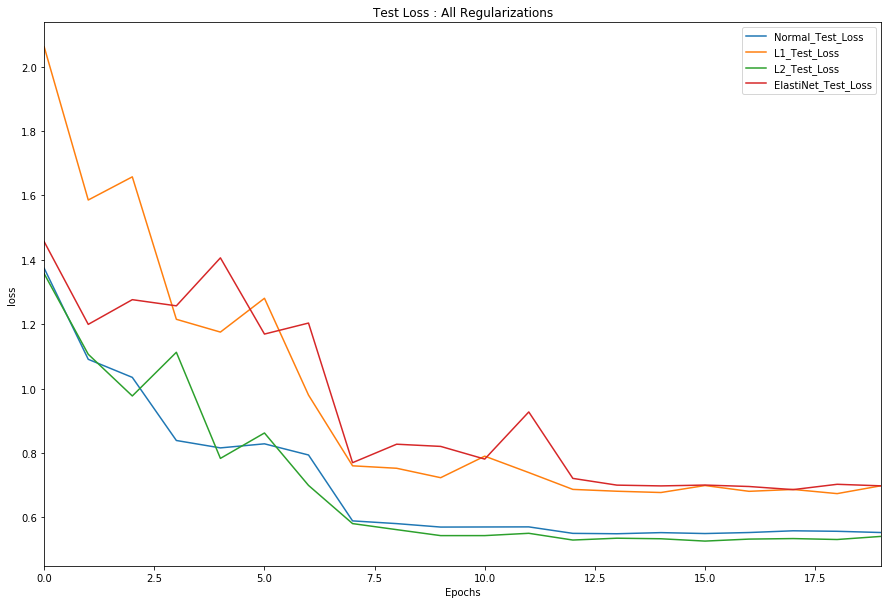

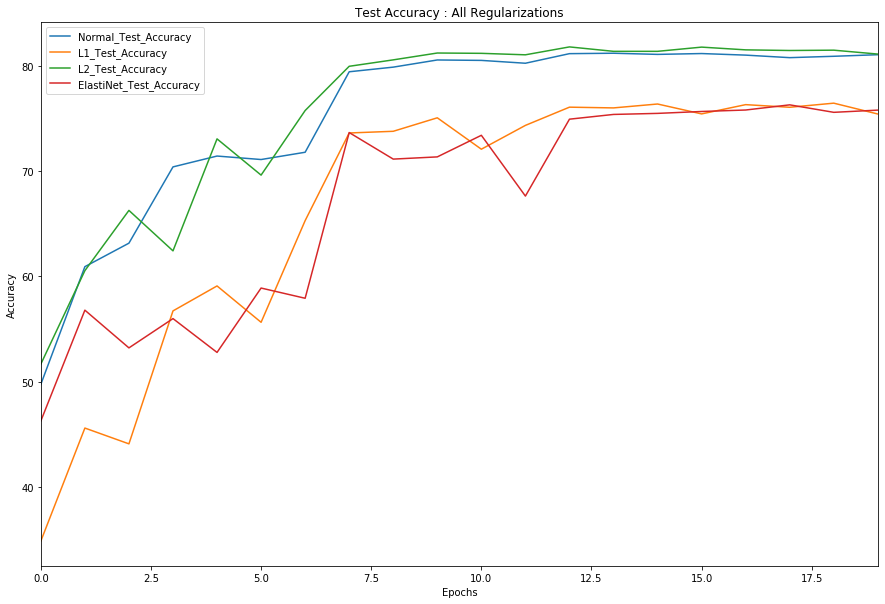

In [0]:
import pandas as pd
Testing_all_loss = pd.DataFrame({'Normal_Test_Loss' : np.array(test_losses).reshape(-1),
                                 'L1_Test_Loss' : np.array(test_losses_L1).reshape(-1),
                                 'L2_Test_Loss' : np.array(test_losses_L2).reshape(-1),
                                 'ElastiNet_Test_Loss' : np.array(test_losses_L1_L2).reshape(-1)
                                 })

Testing_all_accuracy = pd.DataFrame({'Normal_Test_Accuracy' : np.array(test_acc).reshape(-1),
                                     'L1_Test_Accuracy' : np.array(test_acc_L1).reshape(-1),
                                     'L2_Test_Accuracy' : np.array(test_acc_L2).reshape(-1),
                                     'ElastiNet_Test_Accuracy' : np.array(test_acc_L1_L2).reshape(-1)
                                     })

fig1 = Testing_all_loss.plot(figsize=(15,10),kind = 'line', title = "Test Loss : All Regularizations")
fig1.set_xlabel("Epochs")
fig1.set_ylabel("loss")
fig2 = Testing_all_accuracy.plot(figsize=(15,10),kind = 'line',title = "Test Accuracy : All Regularizations")
fig2.set_xlabel("Epochs")
fig2.set_ylabel("Accuracy")

fig1
fig2